# Association Analysis

Market basket analysis examines what products customers are buying and tries to find relationships between products. This is a unsupervised learning tool that is typically used with transaction data on a customer level. We will be looking at interesting associations between products from the data.

### Problem: Wine Recommendations
A restaurant owner has a core menu that has remained constant throughout the past two years, while many
other dishes have rotated on and off the menu. The owner has prepared a dataset of all orders containing
elements of that core menu in which the customer also ordered wine. The dataset has 3 columns:</br>

- orderNo which identifies each table/party that sat at the restaurant,
- seatNo which indicates which seat at the table ordered each meal,
- and item which provides the item in the order

Each seat in the dataset should have an order that contains 3 items: a meat, a side, and a wine.
The restaurant owner would like to add wine suggestions to the menu next to each meat and analyze her
customer ordering habits in general. She is open to listing more than one wine suggestion for each main
course, but only if the data supports it. She doesn’t want to have a fixed number of wines (say, 3) suggested for
each main if the data doesn’t support 3 wine suggestions for each meat. She would rather have the number of
wines suggested vary based upon relationships that the data clearly supports


Resources used:
https://pbpython.com/market-basket-analysis.html

In [1]:
# Import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from matplotlib.pyplot import figure
import mlxtend as ml

In [2]:
# import transactions data as df
df = pd.read_csv(r"C:\Users\chely\Documents\Data Mining\Data\orderData.csv")

# See how many transactions we are dealing with
print(df.shape)
 
# Df preview
df.head()

(228699, 3)


,orderNo,seatNo,item
0,122314,1,Salmon
1,122314,1,Oyster Bay Sauvignon Blanc
2,122314,1,Bean Trio
3,122314,2,Pork Chop
4,122314,2,Three Rivers Red


We need to clean the data and make sure the 'item' column does not have extra spaces and remove rows without transactions.
After the cleanup, we need to consolidate the items into 1 transaction per row with each product to get one-hot encoding and we need to make sure any positive values are converted to a 1 and anything less the 0 is set to 0. 

<AxesSubplot:>

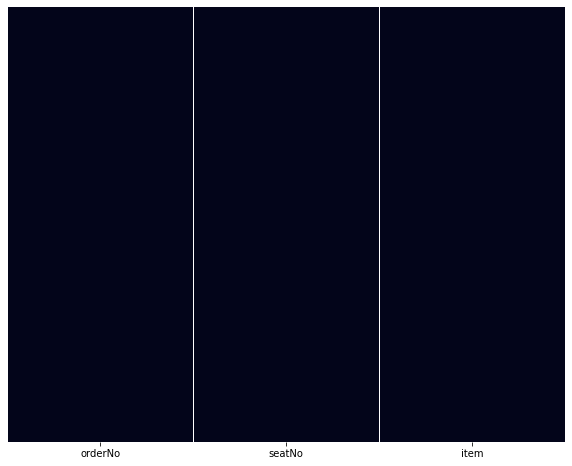

In [3]:
figure(num=None, figsize=(10, 8)) # set plot size
# check for missing transactions
sns.heatmap(df.isnull(), cbar=False, yticklabels=False) # no missing values

In [4]:
# See frequency count of items with most popular at top
df['item'].value_counts()

Seasonal Veg                          14574
Filet Mignon                          13407
Sea Bass                              12302
Duckhorn Chardonnay                   11723
Bean Trio                             11696
Roasted Root Veg                      11323
Pork Tenderloin                       11138
Pork Chop                             10976
Warm Goat Salad                       10605
Adelsheim Pinot Noir                  10308
Roasted Potatoes                       9847
Salmon                                 9336
Caesar Salad                           9168
Mashed Potatoes                        9020
Blackstone Merlot                      8485
Total Recall Chardonnay                8012
Duck Breast                            7915
Single Vineyard Malbec                 7791
Swordfish                              7439
Innocent Bystander Sauvignon Blanc     6397
Oyster Bay Sauvignon Blanc             4815
Echeverria Gran Syrah                  4600
Brancott Pinot Grigio           

In [5]:
# Remove extra spaces at the beginning or end of the string
df['item'] = df['item'].str.strip()

# One-hot encoding function (this format is needed for apriori function used later)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [6]:
# List of unique values for each item

# 13 wines
wines = ['Duckhorn Chardonnay', 'Adelsheim Pinot Noir', 'Blackstone Merlot', 'Total Recall Chardonnay', 
         'Single Vineyard Malbec', 'Innocent Bystander Sauvignon Blanc', 'Oyster Bay Sauvignon Blanc', 
         'Echeverria Gran Syrah', 'Brancott Pinot Grigio', 'Cantina Pinot Bianco', 'Louis Rouge', 
         'Helben Blanc', 'Three Rivers Red']

# 8 meat types
meats = ['Filet Mignon', 'Sea Bass', 'Pork Tenderloin', 'Pork Chop', 
         'Salmon', 'Duck Breast', 'Swordfish', 'Roast Chicken']

# 7 sides
sides = ['Seasonal Veg', 'Bean Trio', 'Roasted Root Veg', 'Warm Goat Salad', 
         'Roasted Potatoes', 'Caesar Salad', 'Mashed Potatoes']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Filet Mignon'),
  Text(1, 0, 'Sea Bass'),
  Text(2, 0, 'Duckhorn Chardonnay'),
  Text(3, 0, 'Bean Trio'),
  Text(4, 0, 'Roasted Root Veg'),
  Text(5, 0, 'Pork Tenderloin'),
  Text(6, 0, 'Pork Chop'),
  Text(7, 0, 'Warm Goat Salad'),
  Text(8, 0, 'Adelsheim Pinot Noir')])

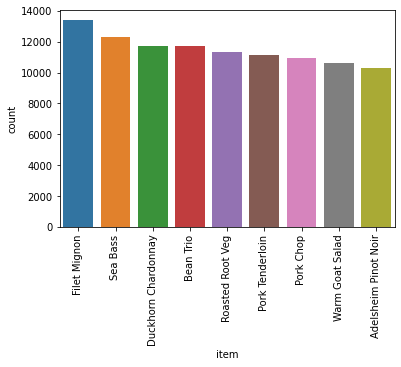

In [7]:
# Get Count plot of top 10 items
sns.countplot(x = 'item', data = df, order = df['item'].value_counts().iloc[1:10].index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Seasonal Veg'),
  Text(1, 0, 'Bean Trio'),
  Text(2, 0, 'Roasted Root Veg'),
  Text(3, 0, 'Warm Goat Salad'),
  Text(4, 0, 'Roasted Potatoes'),
  Text(5, 0, 'Caesar Salad'),
  Text(6, 0, 'Mashed Potatoes')])

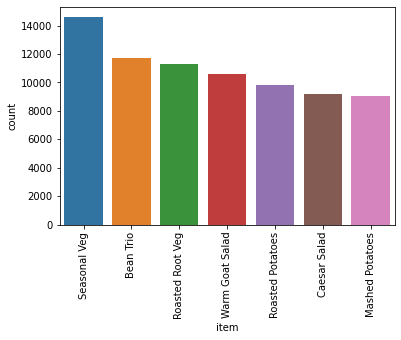

In [8]:
sides_df = df[df['item'].isin(sides)]

# Get Count plot of sides
sns.countplot(x = 'item', data = sides_df, order = sides_df['item'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Filet Mignon'),
  Text(1, 0, 'Sea Bass'),
  Text(2, 0, 'Pork Tenderloin'),
  Text(3, 0, 'Pork Chop'),
  Text(4, 0, 'Salmon'),
  Text(5, 0, 'Duck Breast'),
  Text(6, 0, 'Swordfish'),
  Text(7, 0, 'Roast Chicken')])

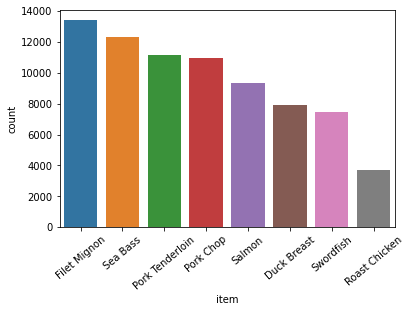

In [9]:
meat_df = df[df['item'].isin(meats)]

# Get Count plot of meats
sns.countplot(x = 'item', data = df, order = meat_df['item'].value_counts().index)
plt.xticks(rotation=40)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Duckhorn Chardonnay'),
  Text(1, 0, 'Adelsheim Pinot Noir'),
  Text(2, 0, 'Blackstone Merlot'),
  Text(3, 0, 'Total Recall Chardonnay'),
  Text(4, 0, 'Single Vineyard Malbec'),
  Text(5, 0, 'Innocent Bystander Sauvignon Blanc'),
  Text(6, 0, 'Oyster Bay Sauvignon Blanc'),
  Text(7, 0, 'Echeverria Gran Syrah'),
  Text(8, 0, 'Brancott Pinot Grigio'),
  Text(9, 0, 'Cantina Pinot Bianco'),
  Text(10, 0, 'Louis Rouge'),
  Text(11, 0, 'Helben Blanc'),
  Text(12, 0, 'Three Rivers Red')])

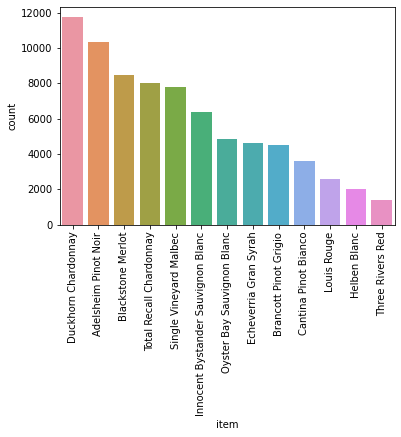

In [10]:
wine_df = df[df['item'].isin(wines)]

# Get Count plot of wines
sns.countplot(x = 'item', data = wine_df, order = wine_df['item'].value_counts().index)
plt.xticks(rotation=90)

In [11]:
# Get count of unique orderNo, seatNo, item combo (should all be 1) and assign it as new index called count
df = df.groupby(['orderNo','seatNo','item']).size().reset_index(name='count')

"""
Step 1: Create a grouped df aggregated by unique orderNo, seatNo, item combo
Step 2: Show counts for each combo with sum and pivot table from long to wide
Step 3: Each row needs to have 1 for the items ordered and 0 for remainder (one-hot encoding)
Step 4: Drop orderNo and seatNo so there are only 1s and 0s for items ordered
"""
basket = df.groupby(['orderNo','seatNo','item'])['count']\
          .sum().unstack().reset_index().fillna(0)\
          .drop(['orderNo', 'seatNo'], axis=1)

basket.shape # 76233 rows, 28 columns
basket_sets = basket.applymap(encode_units)
basket_sets

# apriori() requires df in one-hot-encoding format, which we will use next

item,Adelsheim Pinot Noir,Bean Trio,Blackstone Merlot,Brancott Pinot Grigio,Caesar Salad,Cantina Pinot Bianco,Duck Breast,Duckhorn Chardonnay,Echeverria Gran Syrah,Filet Mignon,...,Roasted Potatoes,Roasted Root Veg,Salmon,Sea Bass,Seasonal Veg,Single Vineyard Malbec,Swordfish,Three Rivers Red,Total Recall Chardonnay,Warm Goat Salad
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76228,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
76229,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
76230,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
76231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [12]:
# Now that we have one-hot encoding df, we can make frequent item sets that have a support of at least 0.5%
# 0.5% was low enough to get data; arbitrary selection
# use_colnames=True means we will use col names as items
frequent_itemsets = apriori(basket_sets, min_support=0.005, use_colnames=True)

# Generate rules with associated support, confidence, and lift metrics
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head() # 452 rules total

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Adelsheim Pinot Noir),(Caesar Salad),0.135217,0.120263,0.020516,0.151727,1.261626,0.004254,1.037092
1,(Caesar Salad),(Adelsheim Pinot Noir),0.120263,0.135217,0.020516,0.170593,1.261626,0.004254,1.042653
2,(Adelsheim Pinot Noir),(Duck Breast),0.135217,0.103826,0.016476,0.121847,1.173565,0.002437,1.020521
3,(Duck Breast),(Adelsheim Pinot Noir),0.103826,0.135217,0.016476,0.158686,1.173565,0.002437,1.027896
4,(Adelsheim Pinot Noir),(Filet Mignon),0.135217,0.175869,0.049650,0.367191,2.087867,0.025870,1.302337


In [13]:
# Make new columns for number of items in antecedent and consequent
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))

In [14]:
# We will only consider rules of 1v1 items
# Limit antecedent and consequent to 1 item each
rules1 = rules[(rules['antecedent_len']==1) & (rules['consequent_len']==1)]

In [15]:
print(rules1.shape) # 214

# see preview of updated rules
rules1.head()

(214, 11)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len
0,(Adelsheim Pinot Noir),(Caesar Salad),0.135217,0.120263,0.020516,0.151727,1.261626,0.004254,1.037092,1,1
1,(Caesar Salad),(Adelsheim Pinot Noir),0.120263,0.135217,0.020516,0.170593,1.261626,0.004254,1.042653,1,1
2,(Adelsheim Pinot Noir),(Duck Breast),0.135217,0.103826,0.016476,0.121847,1.173565,0.002437,1.020521,1,1
3,(Duck Breast),(Adelsheim Pinot Noir),0.103826,0.135217,0.016476,0.158686,1.173565,0.002437,1.027896,1,1
4,(Adelsheim Pinot Noir),(Filet Mignon),0.135217,0.175869,0.049650,0.367191,2.087867,0.025870,1.302337,1,1


We can now filter meats and wines to see most popular itemsets.